In [15]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

In [16]:
#loading the dataset
df_train = pd.read_csv('dsn_2020.csv')
df_test = pd.read_csv('dsn_2020_test.csv')

In [3]:
df_train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [4]:
#since they are all numeric values, fillng based on another feature is not logical
df_train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


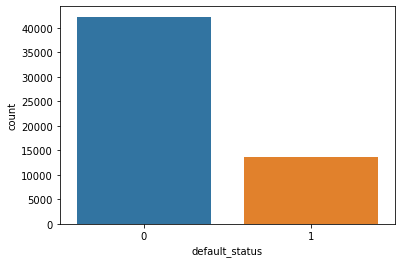

In [14]:
#sns.set_theme(style = "darkgrid")
ax = sns.countplot(x="default_status", data = df_train)

In [18]:
#lets balance the dataset using smote(synthetic minority oversampling technique)
import imblearn
print(imblearn.__version__)

0.7.0


In [19]:
#lets get the numerical columns, because of time, we will be filling each of the nan values with the mean of each column
numerical_features = df_train.select_dtypes(include = [np.number])
numerical_list =  numerical_features.columns.tolist()
numerical_features_test = df_test.select_dtypes(include = [np.number])
numerical_list_test =  numerical_features_test.columns.tolist()

In [20]:
categorical_features = df_train.select_dtypes(include = ['object'])
categorical_list = categorical_features.columns.tolist()
categorical_features_test = df_test.select_dtypes(include = ['object'])
categorical_list_test = categorical_features.columns.tolist()

In [6]:
#missing values
def missing_values(dataframe):
    """
    This function takes a dataframe as input and returns two columns... total missing values and their percentage
    """
    total = dataframe.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(dataframe)*100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total Missing', '%Percentage'])

In [7]:
missing_values(df_train)

,Total Missing,%Percentage
form_field40,43729,78.09
form_field31,39408,70.37
form_field41,38229,68.27
form_field11,31421,56.11
form_field45,31317,55.92
form_field23,28123,50.22
form_field30,25509,45.55
form_field35,23148,41.34
form_field15,22475,40.13
form_field48,20889,37.30


In [8]:
missing_values(df_test)

,Total Missing,%Percentage
form_field40,18828,78.45
form_field31,16810,70.04
form_field41,16349,68.12
form_field45,13538,56.41
form_field11,13398,55.82
form_field23,12125,50.52
form_field30,10908,45.45
form_field35,9866,41.11
form_field15,9592,39.97
form_field48,8922,37.18


In [13]:
df_train['form_field31'].head(10)

0        NaN
1        NaN
2    14508.0
3        NaN
4     5202.0
5        NaN
6    13413.0
7        NaN
8        NaN
9      273.0
Name: form_field31, dtype: float64

In [21]:
mean_train = df_train.filter(numerical_list).mean()

In [22]:
#filling with mean of the respective columns
df_train[numerical_list] = df_train.filter(numerical_list).fillna(mean_train)#if we needed mode, we would have mode.iloc[0]

In [23]:
#now lets fill the test data with the mean_train so as to avoid the model from peeking into our test data
df_test[numerical_list_test] = df_test.filter(numerical_list_test).fillna(mean_train)

In [21]:
df_train['form_field47'].nunique()

2

In [22]:
df_test['form_field47'].nunique()#two categories for the only categorical column... we be using one_hot encoding

2

In [24]:
#from sklearn.preprocessing import LabelEncoder
#we want to make the target class numbers
df_label = {"default_status": {"yes":1, "no":0}}
df_train.replace(df_label, inplace= True)
df_train["default_status"].head()

0    0
1    0
2    1
3    0
4    0
Name: default_status, dtype: int64

In [25]:
X = df_train.drop(["Applicant_ID", "default_status"], axis =1)
y = df_train["default_status"]

X_test = df_test.drop(["Applicant_ID"], axis = 1)

In [26]:
#one-hot-encoding

X_train = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [84]:
#since we have noticed an imbalance in the dataset, lets apply SMOTE to balance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.8)#increasing this by o.5 of the majority class
#under = RandomUnderSampler(sampling_strategy = 0.4)
steps = [('o', over)]
pipeline = Pipeline(steps = steps)
X_smote, y_smote = pipeline.fit_resample(X_train, y)

In [85]:
y_smote.value_counts()

0    42285
1    33828
Name: default_status, dtype: int64

In [34]:
y.value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_smote, y_smote, test_size = 0.2, stratify = y_smote, random_state = 0)

In [54]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train, y, test_size = 0.2, stratify = y, random_state = 0)

In [55]:
model_1 = LogisticRegression()
model_1.fit(X_train_1, y_train_1)
pred = model_1.predict(X_val_1)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.metrics import roc_auc_score
score_1 = roc_auc_score(y_val_1, pred)

In [58]:
score_1

0.504758842862335

In [87]:
from sklearn.preprocessing import StandardScaler

steps_1 = [('scaler', StandardScaler()), ('mod', model_1)]
pipeline_1 = Pipeline(steps = steps_1)
#X_smote, y_smote = pipeline.fit_resample(X_train, y)
pipeline_1.fit(X_train_smote, y_train_smote)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()), ('mod', LogisticRegression())])

In [88]:
pred_1 = pipeline_1.predict(X_val_smote)
score_2 = roc_auc_score(y_val_smote, pred_1)

In [89]:
score_2#with  standard scaling, the score improved significantly

0.7852145633816334

In [90]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
model_2 = LGBMClassifier(n_estimators=30, silent=False, random_state =0, max_depth=5)
steps_2 = [('scaler', StandardScaler()), ('mod', model_2)]
pipeline_2 = Pipeline(steps = steps_2)
pipeline_2.fit(X_train_smote, y_train_smote)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Info] Number of positive: 27062, number of negative: 33828
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 3.338862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12498
[LightGBM] [Info] Number of data points in the train set: 60890, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444441 -> initscore=-0.223158
[LightGBM] [Info] Start training from score -0.223158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Pipeline(steps=[('scaler', StandardScaler()),
                ('mod',
                 LGBMClassifier(max_depth=5, n_estimators=30, random_state=0,
                                silent=False))])

In [91]:
pred_2 = pipeline_2.predict(X_val_smote)
score_3 = roc_auc_score(y_val_smote, pred_2)

In [92]:
score_3

0.8324969920514942

In [93]:
from sklearn.ensemble import RandomForestClassifier
model_3 =RandomForestClassifier()
steps_3 = [('scaler', StandardScaler()), ('mod', model_3)]
pipeline_3 = Pipeline(steps = steps_3)
pipeline_3.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mod', RandomForestClassifier())])

In [94]:
pred_3 = pipeline_3.predict(X_val_smote)
score_3 = roc_auc_score(y_val_smote, pred_3)

In [95]:
score_3

0.8489328008767275

In [75]:
#lets reduce the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
#pca.fit(X_scaled)
steps_4 = [('scaler', StandardScaler()),('pc', pca), ('mod', model_3)]
pipeline_4 = Pipeline(steps = steps_4)
pipeline_4.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()), ('pc', PCA(n_components=50)),
                ('mod', RandomForestClassifier())])

In [76]:
pred_4 = pipeline_4.predict(X_val_smote)
score_4 = roc_auc_score(y_val_smote, pred_4)

In [77]:
score_4

0.769796927709602

In [74]:
model3 = LGBMClassifier(n_estimators=50, silent=False, random_state =0, max_depth=10)

In [78]:
from sklearn.preprocessing import RobustScaler
#trans=RobustScaler()
model_5 =RandomForestClassifier()
steps_5 = [('scaler', RobustScaler()), ('mod', model_5)]
pipeline_5 = Pipeline(steps = steps_5)
pipeline_5.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', RobustScaler()), ('mod', RandomForestClassifier())])

In [79]:
pred_5 = pipeline_5.predict(X_val_smote)
score_5 = roc_auc_score(y_val_smote, pred_5)

In [81]:
score_5

0.7813849473109664

In [ ]:
from sklearn.svm import SVC
model_0 = SVC()
steps_0 = [('scaler', StandardScaler()), ('mod', model_0)]
pipeline_0 = Pipeline(steps = steps_0)
pipeline_0.fit(X_train_smote, y_train_smote)

In [ ]:
pred_0 = pipeline_0.predict(X_val_smote)
score_0 = roc_auc_score(y_val_smote, pred_0)

In [ ]:
from sklearn.ensemble import StackingClassifier
lev0 = list()
lev0.append('md', model_2)
lev0.append('md1', model_3)
lev0.append()